# Waiter Tips Prediction with Machine Learning

## Introduction to Waiter Tips Prediction with Machine Learning

In the dynamic and fast-paced environment of the hospitality industry, understanding the factors that influence tipping behavior can significantly impact restaurant revenue and staff satisfaction. My project, "Waiter Tips Prediction with Machine Learning," addresses this challenge by leveraging advanced machine learning techniques to predict waiter tips. This project aims to provide restaurant managers with actionable insights to optimize service and enhance customer experience.

### Project Overview

This project utilizes two powerful machine learning libraries: **PyCaret** and **TensorFlow Keras**. PyCaret is an open-source, low-code machine learning library in Python that streamlines the process of building and deploying machine learning models. TensorFlow Keras, on the other hand, is a high-level neural networks API that enables fast experimentation and efficient model building.

### Problem Statement

The primary goal of this project is to predict the amount of tips a waiter can expect based on various factors such as the total bill, dining party size, time of day, day of the week, and customer demographics. Accurate tip prediction can help in understanding customer behavior, scheduling staff more effectively, and tailoring services to enhance customer satisfaction.

### Model Building with PyCaret

PyCaret was utilized to quickly build and compare multiple machine learning models. The process involved:
- **Data Preparation:** Splitting the dataset into training and testing sets.
- **Model Selection:** Using PyCaret's built-in functionalities to test various regression models such as Linear Regression, Random Forest, and Gradient Boosting.
- **Hyperparameter Tuning:** Optimizing model parameters to improve performance.
- **Evaluation:** Comparing models based on metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) values.

### Deep Learning with TensorFlow Keras

To capture complex patterns and relationships in the data, I also implemented a deep learning model using TensorFlow Keras. This involved:
- **Model Architecture:** Designing a neural network with multiple layers, including dense layers with ReLU activation functions.
- **Training:** Using the training data to fit the model, with techniques like early stopping and dropout to prevent overfitting.
- **Evaluation:** Assessing the model's performance on the test set and comparing it with the traditional machine learning models.

### Results and Insights

The project successfully demonstrated that machine learning models could predict waiter tips with reasonable accuracy. The insights gained from the feature importance analysis provided valuable information on which factors most significantly influenced tipping behavior.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
figure = px.scatter(data_frame = df, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [5]:
figure = px.scatter(data_frame = df, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [6]:
figure = px.scatter(data_frame = df, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [7]:
figure = px.pie(df,
             values='tip',
             names='day',hole = 0.5)
figure.show()

In [8]:
figure = px.pie(df,
             values='tip',
             names='sex',hole = 0.5)
figure.show()

In [9]:
figure = px.pie(df,
             values='tip',
             names='smoker',hole = 0.5)
figure.show()

In [10]:
figure = px.pie(df,
             values='tip',
             names='time',hole = 0.5)
figure.show()

In [11]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


Looking at the graphs, I label them according to their values ​​in ascending order.

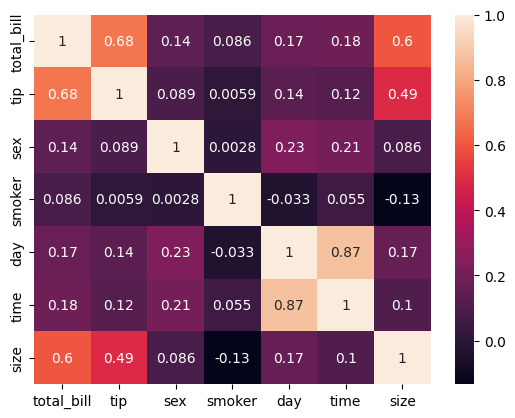

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [13]:
df.corr(numeric_only=True)["tip"].sort_values(ascending=False)

tip           1.000000
total_bill    0.675734
size          0.489299
day           0.135499
time          0.121629
sex           0.088862
smoker        0.005929
Name: tip, dtype: float64

In [14]:
df.drop(["sex","smoker","time"], axis=1, inplace=True)
df.head()

,total_bill,tip,day,size
0,16.99,1.01,3,2
1,10.34,1.66,3,3
2,21.01,3.50,3,3
3,23.68,3.31,3,2
4,24.59,3.61,3,4


Normally I should pick rows with correlation between 0.20 and 0.90. However, since the data set is small, I involve an extra column.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("tip", axis=1), df["tip"], test_size=0.2, random_state=42)

In [17]:
!pip install pycaret

In [18]:
from pycaret.regression import*

In [19]:
setup(df, target="tip")

,Description,Value
0,Session id,7634
1,Target,tip
2,Target type,Regression
3,Original data shape,"(244, 4)"
4,Transformed data shape,"(244, 4)"
5,Transformed train set shape,"(170, 4)"
6,Transformed test set shape,"(74, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [20]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.7571,1.0753,1.0003,0.4797,0.2306,0.2778,0.0400
en,Elastic Net,0.7624,1.0798,1.0036,0.4792,0.2309,0.2816,0.0410
lasso,Lasso Regression,0.7685,1.0895,1.0092,0.4759,0.2319,0.2855,0.0430
llar,Lasso Least Angle Regression,0.7685,1.0895,1.0092,0.4759,0.2319,0.2855,0.0440
br,Bayesian Ridge,0.7632,1.0942,1.0087,0.4737,0.2322,0.2801,0.0430
ridge,Ridge Regression,0.7690,1.1155,1.0185,0.4642,0.2342,0.2820,0.0490
lr,Linear Regression,0.7692,1.1160,1.0187,0.4639,0.2343,0.2820,1.2660
lar,Least Angle Regression,0.7692,1.1160,1.0187,0.4639,0.2343,0.2820,0.0400
huber,Huber Regressor,0.7753,1.1260,1.0253,0.4564,0.2344,0.2799,0.1420
lightgbm,Light Gradient Boosting Machine,0.8561,1.4006,1.1348,0.3424,0.2588,0.3184,0.3310


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

OrthogonalMatchingPursuit()

In [21]:
df.shape

(244, 4)

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
model=Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [24]:
model.fit(x_train, y_train, epochs=100, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 2s 40ms/step - loss: 38.5059 - val_loss: 27.4084
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 33.7957 - val_loss: 23.9158
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 29.7980 - val_loss: 20.9308
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 26.3626 - val_loss: 18.3524
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 23.2805 - val_loss: 16.0527
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 20.6289 - val_loss: 14.0236
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 18.1955 - val_loss: 12.3076
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 16.1475 - val_loss: 10.8206
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 14.3656 - val_loss: 9.4463
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 12.7105 - val_loss: 8.3697
Epoch 

In [25]:
from sklearn.metrics import r2_score
pred=model.predict(x_test)
r2_score(y_test, pred)

2/2 [==============================] - 0s 6ms/step


-3.342342564664089

In [26]:
best_model=create_model("br")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3685,0.2109,0.4592,0.8150,0.1357,0.1731
1,0.6901,0.8373,0.9151,0.5793,0.2384,0.2842
2,0.5897,0.6223,0.7888,0.6696,0.1825,0.1996
3,1.0691,1.8943,1.3763,0.1491,0.2843,0.3607
4,0.9076,1.3207,1.1492,0.2482,0.2674,0.3384
5,0.9616,1.5487,1.2445,0.5711,0.2779,0.3819
6,0.8532,1.7279,1.3145,0.5817,0.2469,0.2700
7,0.7404,0.9815,0.9907,0.3421,0.2330,0.2844
8,0.5656,0.5098,0.7140,0.4162,0.1838,0.2134


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

As a result, I identified the best predictive model. I expected that the metrics would not be good because when I looked at the correlation, I realized that they did not have a proper relationship. However, as I always say, metrics alone are not enough to evaluate a model. That's why it makes sense to write an interface for your models and test them in real life.